In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as ply
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
date=pd.read_csv("https://raw.githubusercontent.com/Schwartz-Manuel/Portfolio-works/main/CODE%20BASIC%20CHALLENGE%207/C7_Input%20Files/dataset/dim_date.csv")
districts=pd.read_csv("https://raw.githubusercontent.com/Schwartz-Manuel/Portfolio-works/main/CODE%20BASIC%20CHALLENGE%207/C7_Input%20Files/dataset/dim_districts.csv")
rev_reg=pd.read_csv("https://raw.githubusercontent.com/Schwartz-Manuel/Portfolio-works/main/CODE%20BASIC%20CHALLENGE%207/C7_Input%20Files/dataset/fact_stamps.csv")
veh_sales=pd.read_csv("https://raw.githubusercontent.com/Schwartz-Manuel/Portfolio-works/main/CODE%20BASIC%20CHALLENGE%207/C7_Input%20Files/dataset/fact_transport.csv")
sector=pd.read_csv("https://raw.githubusercontent.com/Schwartz-Manuel/Portfolio-works/main/CODE%20BASIC%20CHALLENGE%207/C7_Input%20Files/dataset/fact_TS_iPASS.csv")

In [3]:
date.isnull().sum()

month          0
Mmm            0
quarter        0
fiscal_year    0
dtype: int64

In [4]:
districts.isnull().sum()

dist_code    0
district     0
dtype: int64

In [5]:
rev_reg.isnull().sum()

dist_code                   0
month                       0
documents_registered_cnt    0
documents_registered_rev    0
estamps_challans_cnt        0
estamps_challans_rev        0
dtype: int64

In [6]:
veh_sales.isnull().sum()

dist_code                    0
month                        0
fuel_type_petrol             0
fuel_type_diesel             0
fuel_type_electric           0
fuel_type_others             0
vehicleClass_MotorCycle      0
vehicleClass_MotorCar        0
vehicleClass_AutoRickshaw    0
vehicleClass_Agriculture     0
vehicleClass_others          0
seatCapacity_1_to_3          0
seatCapacity_4_to_6          0
seatCapacity_above_6         0
Brand_new_vehicles           0
Pre-owned_vehicles           0
category_Non-Transport       0
category_Transport           0
dtype: int64

In [7]:
sector.isnull().sum()

dist_code              0
month                  0
sector                 0
investment in cr       0
number_of_employees    0
dtype: int64

## As there is no null in any of the data set , we are directly going into EDA

# EXPLORING STAMP REGISTRATION
## 1. How does the revenue generated from document registration vary 
## across districts in Telangana? List down the top 5 districts that showed 
## the highest document registration revenue growth between FY 2019 
## and 2022.


In [8]:
result=rev_reg.merge(districts,on="dist_code",how="inner")
result['month']=pd.to_datetime(result['month'])
date['month']=pd.to_datetime(date['month'])
result=result.merge(date,on='month',how='inner')
result=result[(result['fiscal_year']>=2019) & (result['fiscal_year']<=2022)]
result=result.groupby(by='district').sum('documents_registered_rev')[['documents_registered_rev']]
result=result.sort_values("documents_registered_rev",ascending=False).head(5)
result

,documents_registered_rev
district,
Rangareddy,108198682809
Medchal_Malkajgiri,64071382839
Hyderabad,38396743983
Sangareddy,22024502771
Hanumakonda,7927494100


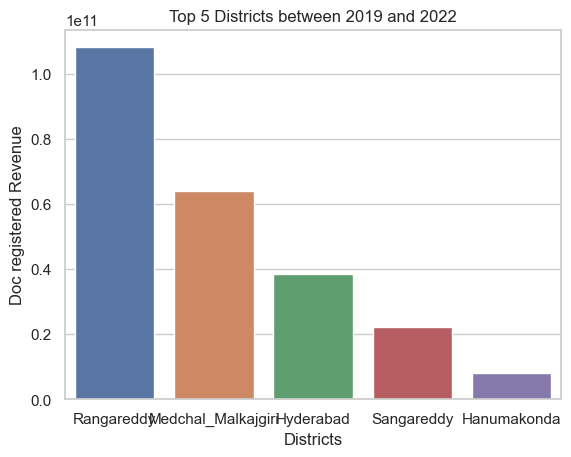

<Figure size 1000x1000 with 0 Axes>

In [9]:
result=result.reset_index()
sns.set(style="whitegrid")  # Set the style of the plot
sns.barplot(x='district', y='documents_registered_rev', data=result)
plt.xlabel('Districts')
plt.ylabel('Doc registered Revenue')
plt.title('Top 5 Districts between 2019 and 2022')
plt.figure(figsize=(10,10))
plt.show()

## 2. How does the revenue generated from document registration compare 
## to the revenue generated from e-stamp challans across districts? List 
## down the top 5 districts where e-stamps revenue contributes 
## significantly more to the revenue than the documents in FY 2022?

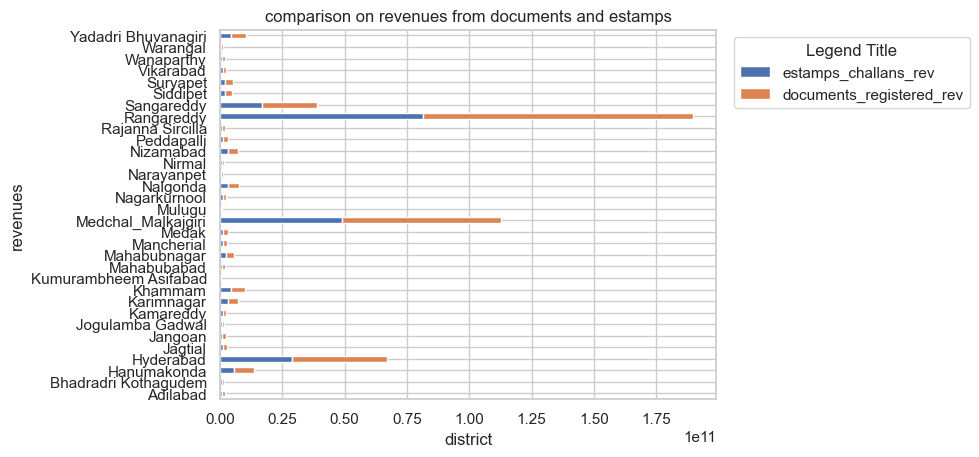

In [10]:
result=rev_reg.merge(districts,on="dist_code",how="inner")
result['month']=pd.to_datetime(result['month'])
date['month']=pd.to_datetime(date['month'])
result=result.merge(date,on='month',how='inner')
result=result.groupby(by=['district']).agg({'estamps_challans_rev':'sum','documents_registered_rev':'sum'}).reset_index()
result.plot(x='district',kind='barh',stacked=True)
plt.xlabel('district')
plt.ylabel('revenues')
plt.title('comparison on revenues from documents and estamps')
plt.legend(title='Legend Title',bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

In [11]:
result=rev_reg.merge(districts,on="dist_code",how="inner")
result['month']=pd.to_datetime(result['month'])
date['month']=pd.to_datetime(date['month'])
result=result.merge(date,on='month',how='inner')

# creating custom function
def compare(x):
    if x['documents_registered_rev'] > x['estamps_challans_rev']:
        return 'estamps_challans_rev is lesser'
    elif x['estamps_challans_rev'] > x['documents_registered_rev']:
        return 'estamps_challans_rev is greater'
    else:
        return 'documents_registered_rev = estamps_challans_rev'
    
    
result['comparison']=result.apply(compare,axis=1)

pd.DataFrame(result.groupby(by=["district"])['comparison']) # comparison done

,0,1
0,Adilabad,22 estamps_challans_rev is lesser 54 ...
1,Bhadradri Kothagudem,12 estamps_challans_rev is lesser 44 ...
2,Hanumakonda,27 estamps_challans_rev is lesser 59 ...
3,Hyderabad,8 estamps_challans_rev is lesser 40 ...
4,Jagtial,13 estamps_challans_rev is lesser 45 ...
5,Jangoan,30 estamps_challans_rev ...
6,Jogulamba Gadwal,14 estamps_challans_rev is lesser 46 ...
7,Kamareddy,21 estamps_challans_rev is lesser 53 ...
8,Karimnagar,6 estamps_challans_rev is lesser 38 ...
9,Khammam,16 estamps_challans_rev is lesser 48 ...


In [12]:
result=result[(result['comparison']=="estamps_challans_rev is greater") & (result['fiscal_year']==2022)][['estamps_challans_rev','district']]
result.groupby(by='district').sum('estamps_challans_rev').sort_values(by='estamps_challans_rev',ascending=False).head(5)

,estamps_challans_rev
district,
Rangareddy,26419567934
Hyderabad,9686499583
Medchal_Malkajgiri,9512874157
Sangareddy,4920632085
Hanumakonda,1667893842


## 3. Is there any alteration of e-Stamp challan count and document 
## registration count pattern since the implementation of e-Stamp 
## challan? If so, what suggestions would you propose to the 
## government?


In [13]:
result=rev_reg.merge(districts,on="dist_code",how="inner")
result['month']=pd.to_datetime(result['month'])
date['month']=pd.to_datetime(date['month'])
result=result.merge(date,on='month',how='inner')

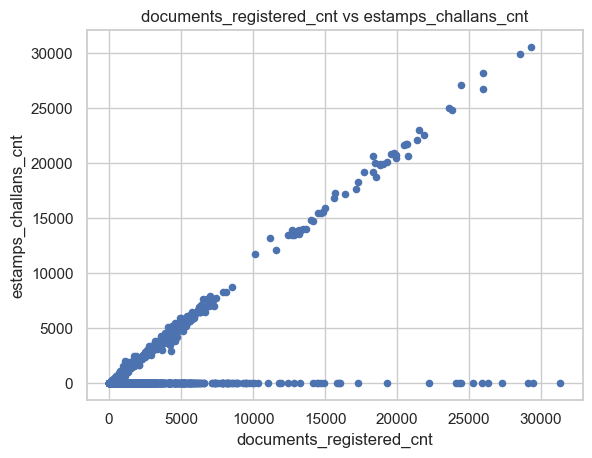

In [14]:
result.plot(kind='scatter',x='documents_registered_cnt',y='estamps_challans_cnt')
plt.xlabel('documents_registered_cnt')
plt.ylabel("estamps_challans_cnt")
plt.title("documents_registered_cnt vs estamps_challans_cnt")
plt.show()

As we could see a linear pattern is established between documents_registered_count and estamps_challans_count. so I suggest government to focus on increasing any one among those two counts inorder to increase telungana's growth.

## 4. Categorize districts into three segments based on their stamp 
## registration revenue generation during the fiscal year 2021 to 2022. 

In [15]:
result=rev_reg.merge(districts,on="dist_code",how="inner")
result['month']=pd.to_datetime(result['month'])
date['month']=pd.to_datetime(date['month'])
result=result.merge(date,on='month',how='inner')
result=result[(result['fiscal_year']==2021)|(result['fiscal_year']==2022)] # years included '2021' and '2022'
result=result.groupby(by='district').agg({'estamps_challans_rev':'sum','documents_registered_rev':'sum'})
result['total_stamp_rev']=result['estamps_challans_rev']+result['documents_registered_rev']
result

,estamps_challans_rev,documents_registered_rev,total_stamp_rev
district,,,
Adilabad,723003081,720926384,1443929465
Bhadradri Kothagudem,540722552,534180926,1074903478
Hanumakonda,4959670232,4895047216,9854717448
Hyderabad,25267992981,24977902615,50245895596
Jagtial,1079332319,1069526503,2148858822
Jangoan,747428965,733613593,1481042558
Jogulamba Gadwal,603996030,601645197,1205641227
Kamareddy,859661958,851578792,1711240750
Karimnagar,2633977624,2619104284,5253081908


In [16]:
quart_25=result['total_stamp_rev'].quantile(0.25)
quart_50=result['total_stamp_rev'].quantile(0.50)
quart_75=result['total_stamp_rev'].quantile(0.75)
quart_100=result['total_stamp_rev'].quantile(1)

In [17]:
#low = values present between 25th to 50th percentile . districts generated low revenue
#medium = values present between 50th to 75th percentile . districts generated medium revenue
#high = values present between 75th to 100th percentile . districts generated high revenue
low = result[(result['total_stamp_rev']>=quart_25) & (result['total_stamp_rev']<=quart_50)]
medium = result[(result['total_stamp_rev']>=quart_50) & (result['total_stamp_rev']<=quart_75)]
high = result[(result['total_stamp_rev']>=quart_75) & (result['total_stamp_rev']<=quart_100)]

In [18]:
low

,estamps_challans_rev,documents_registered_rev,total_stamp_rev
district,,,
Adilabad,723003081,720926384,1443929465
Jagtial,1079332319,1069526503,2148858822
Jangoan,747428965,733613593,1481042558
Kamareddy,859661958,851578792,1711240750
Nagarkurnool,881618696,878634232,1760252928
Rajanna Sircilla,750209633,744571024,1494780657
Vikarabad,906189501,887185451,1793374952
Wanaparthy,746269937,743833686,1490103623


In [19]:
medium

,estamps_challans_rev,documents_registered_rev,total_stamp_rev
district,,,
Mahabubnagar,1981371785,1960011646,3941383431
Mancherial,1105983406,1086538493,2192521899
Medak,1146081195,1122517735,2268598930
Nalgonda,2600080824,2586636489,5186717313
Nizamabad,2614662871,2592723703,5207386574
Peddapalli,1126687326,1110412457,2237099783
Siddipet,1762872744,1741861752,3504734496
Suryapet,1818082431,1802987342,3621069773


In [20]:
high

,estamps_challans_rev,documents_registered_rev,total_stamp_rev
district,,,
Hanumakonda,4959670232,4895047216,9854717448
Hyderabad,25267992981,24977902615,50245895596
Karimnagar,2633977624,2619104284,5253081908
Khammam,3646844602,3615169800,7262014402
Medchal_Malkajgiri,42344075412,42244415731,84588491143
Rangareddy,70682297387,69563226936,140245524323
Sangareddy,14782041561,14617585438,29399626999
Yadadri Bhuvanagiri,3801870232,3787070881,7588941113


# EXPLORING TRANSPORTATION
## 5. Investigate whether there is any correlation between vehicle sales and 
## specific months or seasons in different districts. Are there any months 
## or seasons that consistently show higher or lower sales rate, and if yes, 
## what could be the driving factors? (Consider Fuel-Type category only)

In [21]:
veh_sales1=veh_sales.drop(['fuel_type_others','month','dist_code'],axis=1) #discarding other fuel types and other unneccessarry for future
veh_sales['total_sales_count']=veh_sales1.sum(axis=1)
veh_sales['month']=pd.to_datetime(veh_sales['month'])
veh_sales['month1']=veh_sales['month'].dt.month

In [22]:
veh_sales=veh_sales.groupby(by='month1').sum('total_sales_count')[['total_sales_count']].reset_index()
veh_sales['month1'].corr(veh_sales['total_sales_count']) # as we could see only 24% correlation between month and total vehicle sales

0.24191401457914108

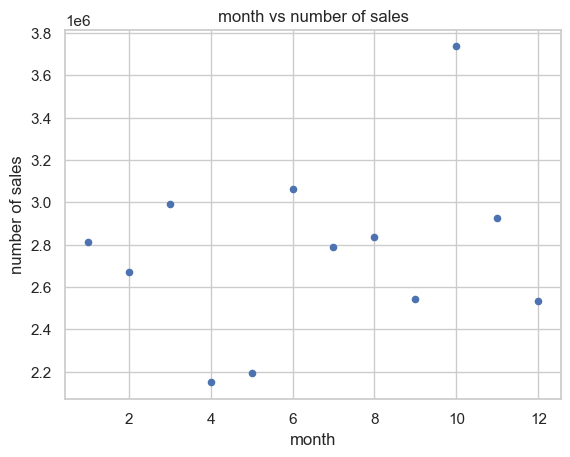

In [23]:
veh_sales.plot(kind='scatter',x='month1',y='total_sales_count')
plt.xlabel('month')
plt.ylabel("number of sales")
plt.title("month vs number of sales")
plt.show()

Number of vehicles sold is maximum in the month of october and june , minimum in the month of apirl and may. No patterns could be seen. 

REASON : October would be start for festival preparations like Diwali , christmas and newyear .
         June would be the start for accademic years in schools ,colleges etc.
         
so I think this might be the reason for maximum sale in these months         

## 6. How does the distribution of vehicles vary by vehicle class 
## (MotorCycle, MotorCar, AutoRickshaw, Agriculture) across different 
## districts? Are there any districts with a predominant preference for a 
## specific vehicle class? Consider FY 2022 for analysis.

In [24]:
veh_sales=pd.read_csv("C:\\SZ\\CODE BASIC CHALLENGE 7\\C7_Input Files\\dataset\\fact_transport.csv")
veh_sales=veh_sales.merge(districts,on="dist_code",how="inner")
veh_sales=veh_sales[['vehicleClass_MotorCycle','vehicleClass_MotorCar','vehicleClass_AutoRickshaw','vehicleClass_Agriculture','district','month']]
veh_sales['month']=pd.to_datetime(veh_sales['month'])
date['month']=pd.to_datetime(date['month'])
veh_sales=veh_sales.merge(date,on='month',how='inner')
veh_sales=veh_sales[veh_sales['fiscal_year']==2022]
veh_sales=veh_sales.groupby('district').sum([['vehicleClass_MotorCycle','vehicleClass_MotorCar','vehicleClass_AutoRickshaw','vehicleClass_Agriculture']])[['vehicleClass_MotorCycle','vehicleClass_MotorCar','vehicleClass_AutoRickshaw','vehicleClass_Agriculture']]
veh_sales

,vehicleClass_MotorCycle,vehicleClass_MotorCar,vehicleClass_AutoRickshaw,vehicleClass_Agriculture
district,,,,
Adilabad,10410,1416,368,467
Bhadradri Kothagudem,17022,3157,1388,2013
Hyderabad,206819,51447,8397,20
Jagtial,13639,2055,272,858
Jangoan,8617,1177,397,1225
Jayashankar Bhupalpally,9225,1343,218,1928
Jogulamba Gadwal,10300,899,116,868
Kamareddy,15184,2153,379,748
Karimnagar,19411,4818,1042,999


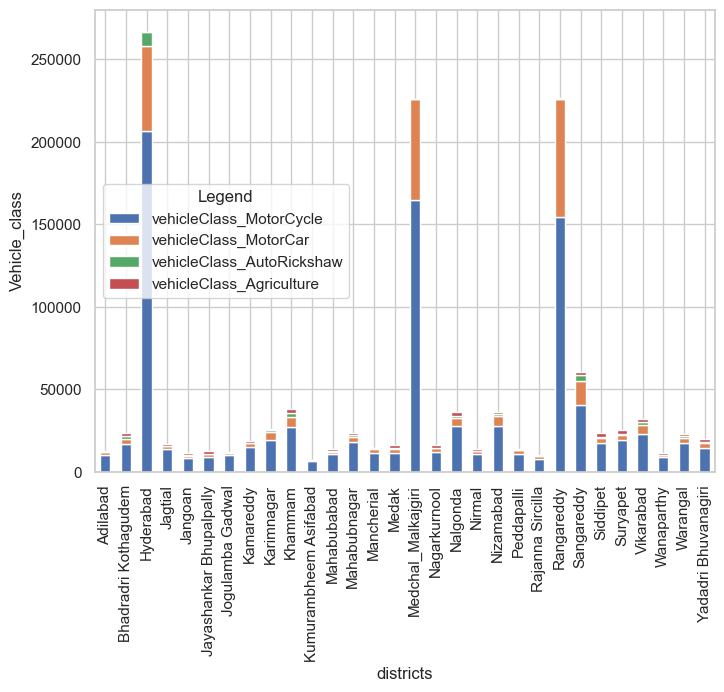

In [25]:
veh_sales.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.xlabel("districts")
plt.ylabel("Vehicle_class")
plt.legend(title="Legend")
plt.show()

All the districts has predominant preferance for the vehicle of class 'MOTOR CYCLE'

## 7. List down the top 3 and bottom 3 districts that have shown the highest 
## and lowest vehicle sales growth during FY 2022 compared to FY 
## 2021? (Consider and compare categories: Petrol, Diesel and Electric) 


In [26]:
veh_sales=pd.read_csv("C:\\SZ\\CODE BASIC CHALLENGE 7\\C7_Input Files\\dataset\\fact_transport.csv")
veh_sales=veh_sales.merge(districts,on="dist_code",how="inner")
veh_sales['month']=pd.to_datetime(veh_sales['month'])
date['month']=pd.to_datetime(date['month'])
veh_sales=veh_sales.merge(date,on='month',how='inner')
veh_sales=veh_sales.drop(['fuel_type_others'],axis=1)
veh_sales_2022=veh_sales[veh_sales['fiscal_year']==2022]
veh_sales_2021=veh_sales[veh_sales['fiscal_year']==2021]
veh_sales_2021['total_sales']=veh_sales_2021.drop(['district','Mmm','quarter','fiscal_year','month','dist_code'],axis=1).sum(axis=1)
veh_sales_2022['total_sales']=veh_sales_2021.drop(['district','Mmm','quarter','fiscal_year','month','dist_code'],axis=1).sum(axis=1)

In [27]:
# top 3 districts with maximum vehicle sales in 2021
veh_sales_2021.groupby("district").sum("total_sales")[['total_sales']].sort_values('total_sales',ascending=False).head(3) 

,total_sales
district,
Hyderabad,1325329
Medchal_Malkajgiri,1189686
Rangareddy,1081300


In [28]:
# bottom 3 districts with minimum vehicle sales in 2021
veh_sales_2021.groupby("district").sum("total_sales")[['total_sales']].sort_values('total_sales',ascending=False).tail(3) 

,total_sales
district,
Jogulamba Gadwal,83048
Wanaparthy,82184
Kumurambheem Asifabad,59932


In [29]:
# top 3 districts with maximum vehicle sales in 2022
veh_sales_2022.groupby("district").sum("total_sales")[['total_sales']].sort_values('total_sales',ascending=False).head(3) 

,total_sales
district,
Adilabad,0.0
Bhadradri Kothagudem,0.0
Warangal,0.0


In [30]:
# bottom 3 districts with minimum vehicle sales in 2022
veh_sales_2022.groupby("district").sum("total_sales")[['total_sales']].sort_values('total_sales',ascending=False).tail(3)

,total_sales
district,
Jagtial,0.0
Hyderabad,0.0
Yadadri Bhuvanagiri,0.0


# EXPLORING Ts-Ipass
## 8. List down the top 5 sectors that have witnessed the most significant 
## investments in FY 2022.

In [31]:
sector['month']=pd.to_datetime(sector['month'])
date['month']=pd.to_datetime(date['month'])
Sector=sector.merge(date,on='month',how='inner')
Sector=Sector[Sector['fiscal_year']==2022]
Sector=Sector.groupby('sector').sum("investment in cr")[['investment in cr']].sort_values("investment in cr",ascending=False).head(5).reset_index()
#MSS = most significant sectors
MSS=Sector['sector']
MSS

0                    Plastic and Rubber
1                            Automobile
2    Electrical and Electronic Products
3                                   R&D
4                                Others
Name: sector, dtype: object

## 9. List down the top 3 districts that have attracted the most significant 
## sector investments during FY 2019 to 2022? What factors could have 
## led to the substantial investments in these particular districts? 

In [32]:
Sector=sector.merge(districts,on='dist_code',how='inner')
date['month']=pd.to_datetime(date['month'])
Sector['month']=pd.to_datetime(Sector['month'])
Sector=Sector.merge(date,on='month',how='inner')
Sector=Sector[(Sector['fiscal_year']<=2022) & (Sector['fiscal_year']>=2019)]    
Sector=Sector[Sector['sector'].isin(MSS)==True]

#top 3 districts
Sector.groupby('district')[['sector']].count().sort_values("sector",ascending=False).head(3)

,sector
district,
Medchal_Malkajgiri,15
Sangareddy,13
Rangareddy,11


In [33]:
#bottom 3 districts
Sector.groupby('district')[['sector']].count().sort_values("sector",ascending=False).tail(3)

,sector
district,
Jagtial,1
Suryapet,1
Wanaparthy,1


## 10. Is there any relationship between district investments, vehicles
## sales and stamps revenue within the same district between FY 2021
## and 2022?

In [34]:
#calculating stamp revenuesfor FY 2021 and 2022 for each district
result=rev_reg.merge(districts,on="dist_code",how="inner")
result['month']=pd.to_datetime(result['month'])
date['month']=pd.to_datetime(date['month'])
result=result.merge(date,on='month',how='inner')
result=result[(result['fiscal_year']==2021)|(result['fiscal_year']==2022)] # years included '2021' and '2022'
result=result.groupby(by='district').agg({'estamps_challans_rev':'sum','documents_registered_rev':'sum'})
result['total_stamp_rev']=result['estamps_challans_rev']+result['documents_registered_rev']
stamps_revenue=result[['total_stamp_rev']].reset_index()
stamps_revenue

,district,total_stamp_rev
0,Adilabad,1443929465
1,Bhadradri Kothagudem,1074903478
2,Hanumakonda,9854717448
3,Hyderabad,50245895596
4,Jagtial,2148858822
5,Jangoan,1481042558
6,Jogulamba Gadwal,1205641227
7,Kamareddy,1711240750
8,Karimnagar,5253081908
9,Khammam,7262014402


In [35]:
#calculating vehicle sales for FY 2021 and 2022 for each district
veh_sales=pd.read_csv("C:\\SZ\\CODE BASIC CHALLENGE 7\\C7_Input Files\\dataset\\fact_transport.csv")
veh_sales=veh_sales.merge(districts,on="dist_code",how="inner")
veh_sales['month']=pd.to_datetime(veh_sales['month'])
date['month']=pd.to_datetime(date['month'])
veh_sales=veh_sales.merge(date,on='month',how='inner')
veh_sales=veh_sales[(veh_sales['fiscal_year']==2021) | (veh_sales['fiscal_year']==2022)]
veh_sales['total_sales']=veh_sales.drop(['district','Mmm','quarter','fiscal_year','month','dist_code'],axis=1).sum(axis=1)
veh_sales=veh_sales.groupby("district").sum("total_sales")[['total_sales']].reset_index()
veh_sales

,district,total_sales
0,Adilabad,166239
1,Bhadradri Kothagudem,297794
2,Hyderabad,2743540
3,Jagtial,230915
4,Jangoan,148375
5,Jayashankar Bhupalpally,168150
6,Jogulamba Gadwal,149926
7,Kamareddy,250334
8,Karimnagar,360669
9,Khammam,466589


In [36]:
Sector=sector.merge(districts,on='dist_code',how='inner')
date['month']=pd.to_datetime(date['month'])
Sector['month']=pd.to_datetime(Sector['month'])
Sector=Sector.merge(date,on='month',how='inner')
Sector=Sector[(Sector['fiscal_year']==2021) | (Sector['fiscal_year']==2022)]
Sector_inv=Sector.groupby('district').sum("investment in cr")[['investment in cr']].reset_index()
Sector_inv

,district,investment in cr
0,Adilabad,0.5090
1,Bhadradri Kothagudem,2.2000
2,Hanumakonda,8.0944
3,Hyderabad,1.0500
4,Jagtial,7.1018
5,Jangoan,11.0230
6,Jayashankar Bhupalpally,0.2550
7,Jogulamba Gadwal,1.2232
8,Kamareddy,1.2000
9,Karimnagar,15.4714


In [37]:
df=Sector_inv.merge(veh_sales,on='district',how='inner')
df=df.merge(stamps_revenue,on='district',how='inner')
df

,district,investment in cr,total_sales,total_stamp_rev
0,Adilabad,0.5090,166239,1443929465
1,Bhadradri Kothagudem,2.2000,297794,1074903478
2,Hyderabad,1.0500,2743540,50245895596
3,Jagtial,7.1018,230915,2148858822
4,Jangoan,11.0230,148375,1481042558
5,Jogulamba Gadwal,1.2232,149926,1205641227
6,Kamareddy,1.2000,250334,1711240750
7,Karimnagar,15.4714,360669,5253081908
8,Khammam,10.6396,466589,7262014402
9,Kumurambheem Asifabad,3.0000,102933,269677619


In [38]:
correlation = df['investment in cr'].corr(df['total_sales'])
correlation # relation between 'investment in cr' and 'total_sales' 
# shows strong realtion

0.08162982033196522

In [39]:
correlation = df['investment in cr'].corr(df['total_stamp_rev'])
correlation # relation between 'investment in cr' and 'total_stamp_rev'
# shows medium relation

0.15209681016690232

In [40]:
correlation = df['total_sales'].corr(df['total_stamp_rev'])
correlation # relation between 'total_sales' and 'total_stamp_rev'
# highly corelated.

0.8737421243615008

Strong correlation could be seen between 'total_sales of vehicles' with 'total_stamp_rev' and 'investment_in cr' means that these both are directly proportional to each other.

## 11. Are there any particular sectors that have shown substantial 
## investment in multiple districts between FY 2021 and 2022? 

In [41]:
Sector=sector.merge(districts,on='dist_code',how='inner')
date['month']=pd.to_datetime(date['month'])
Sector['month']=pd.to_datetime(Sector['month'])
Sector=Sector.merge(date,on='month',how='inner')
Sector=Sector[(Sector['fiscal_year']==2021) | (Sector['fiscal_year']==2022)]
Sector=Sector.groupby(by='sector')[['district']].count()
Sector=Sector[Sector['district']!=1]
Sector.reset_index()['sector']

0                         Agro based incl Cold Storages
1                                             Beverages
2     Cement, Cement & Concrete Products, Fly Ash Br...
3                    Electrical and Electronic Products
4                                           Engineering
5     Fertlizers Organic and Inorganic,Pesticides,In...
6                                       Food Processing
7                            Granite and Stone Crushing
8                                                Others
9                                    Paper and Printing
10                        Pharmaceuticals and Chemicals
11                                   Plastic and Rubber
12                                                  R&D
13                                             Textiles
14                                     Wood and Leather
Name: sector, dtype: object

yes there are 15 sectors involved in investments with multiple districts

##  12. Can we identify any seasonal patterns or cyclicality in the 
## investment trends for specific sectors? Do certain sectors 
## experience higher investments during particular months?

In [42]:
Sector=sector
Sector['month']=Sector['month'].astype(str)
Sector['month1']=Sector['month'].str.split('-').str[2]
Sector=Sector.groupby(['month1','sector']).sum('investment in cr')[['investment in cr']]
Sector

investment in cr
month1 sector                                                              
01     Agro based incl Cold Storages                                80.9157
       Automobile                                                 1254.2690
       Beverages                                                   861.6181
       Cement, Cement & Concrete Products, Fly Ash Bricks           39.6009
       Electrical and Electronic Products                          269.3718
...                                                                     ...
12     Plastic and Rubber                                         1958.3268
       R&D                                                          69.7109
       Solar and Other Renewable Energy                             42.4200
       Textiles                                                     45.3775
       Wood and Leather                                              9.7840

[215 rows x 1 columns]

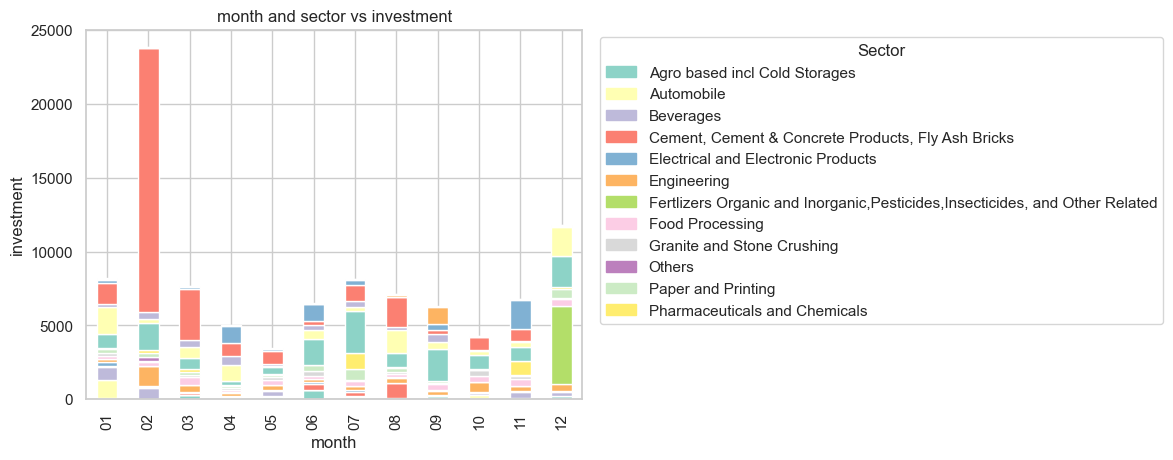

In [43]:
# Get a distinct color palette for the legend
colors = plt.cm.Set3.colors
viz=Sector['investment in cr'].unstack().fillna(0).plot(kind='bar', stacked=True , color=colors)

# Create a custom legend
handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
labels = Sector.reset_index()['sector']
legend = plt.legend(handles, labels, title='Sector', bbox_to_anchor=(1.02, 1), loc='upper left')# bbox_to_anchor separating legend screen out of chart


plt.xlabel('month')
plt.ylabel('investment')
plt.title('month and sector vs investment')
plt.tight_layout()
plt.show()

No , can't identify any seasonal patterns or cyclicality in the¶
investment trends for specific sectors

Yes, Cement & concrete products, Fly Ash Bricks sector had seen a huge investment in month of Feb

# SECONDARY SEARCH

## Which vehicle class and fuel type is more prefered by the people between FY 2021 and 2022 

In [44]:
veh_sales=pd.read_csv("C:\\SZ\\CODE BASIC CHALLENGE 7\\C7_Input Files\\dataset\\fact_transport.csv")
veh_sales['month']=pd.to_datetime(veh_sales['month'])
df=veh_sales.merge(date,on='month',how='inner')
df=df[(df['fiscal_year']==2021)|(df['fiscal_year']==2022)]
motor_cycle=df['vehicleClass_MotorCycle'].sum()
motor_car=df['vehicleClass_MotorCar'].sum()
auto=df['vehicleClass_AutoRickshaw'].sum()
agriculture=df['vehicleClass_Agriculture'].sum()
data=[[motor_cycle,motor_car,auto,agriculture]]
df=pd.DataFrame(data,columns=['vehicleClass_MotorCycle','vehicleClass_MotorCar','vehicleClass_AutoRickshaw','vehicleClass_Agriculture'])
max(df)

'vehicleClass_MotorCycle'

MOTOR_CYCLE WAS PREFERED BY MOST OF THE PEOPLE

In [45]:
veh_sales=pd.read_csv("C:\\SZ\\CODE BASIC CHALLENGE 7\\C7_Input Files\\dataset\\fact_transport.csv")
veh_sales['month']=pd.to_datetime(veh_sales['month'])
df=veh_sales.merge(date,on='month',how='inner')
df=df[(df['fiscal_year']==2021)|(df['fiscal_year']==2022)]
df=df[['fuel_type_petrol','fuel_type_diesel','fuel_type_electric','fuel_type_others']]
dic={}
for i in df.columns:
    tot=df[i].sum()
    dic[i]=tot
print(max(dic))    
    

fuel_type_petrol


petrol was prefered by most of the people

## Sector that need an improvement and to be focused by the government in each district

In [46]:
grouped_df=sector.merge(districts,on='dist_code',how='inner').groupby(['district','sector'])[['sector']].count()
grouped_df.columns=['sector_count']
grouped_df=grouped_df[grouped_df['sector_count']<13] # 13 is the average of sector_count
grouped_df

sector_count
district            sector                                                     
Adilabad            Agro based incl Cold Storages                             5
                    Engineering                                               8
                    Granite and Stone Crushing                                5
                    Others                                                    7
                    Paper and Printing                                        3
...                                                                         ...
Yadadri Bhuvanagiri Electrical and Electronic Products                       12
                    R&D                                                       4
                    Real Estate,Industrial Parks and IT Buildings             1
                    Solar and Other Renewable Energy                          5
                    Wood and Leather                                          7

[273 rows x 1 columns]

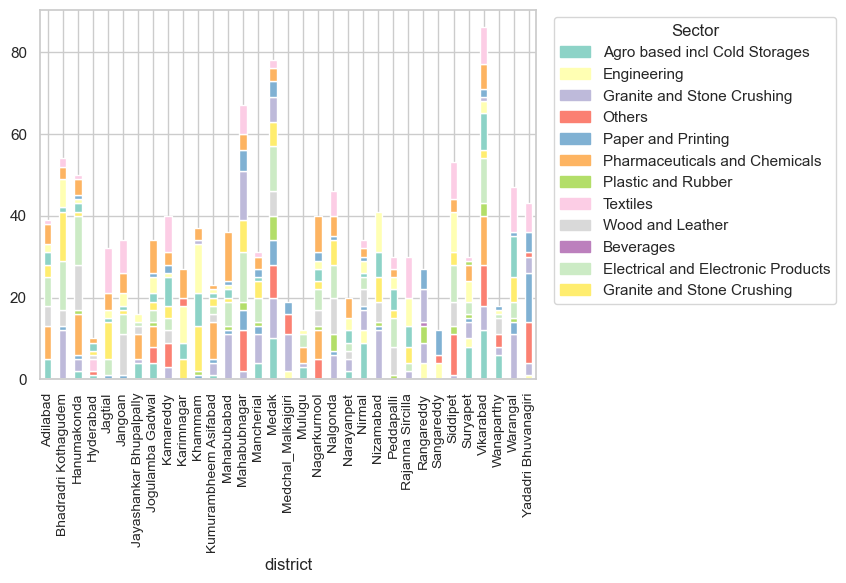

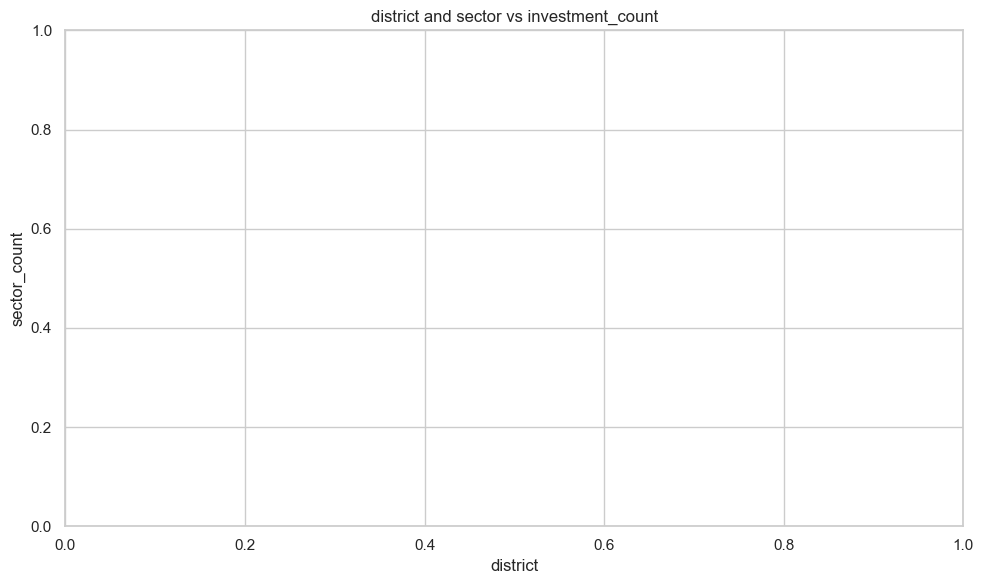

In [47]:
# Get a distinct color palette for the legend
colors = plt.cm.Set3.colors
vizz=grouped_df['sector_count'].unstack().fillna(0).plot(kind='bar', stacked=True , color=colors)


# Create a custom legend
handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
labels = grouped_df.reset_index()['sector']
legend = plt.legend(handles, labels, title='Sector', bbox_to_anchor=(1.02, 1), loc='upper left')# bbox_to_anchor separating legend screen out of chart

plt.xticks(fontsize=10)
plt.figure(figsize=(10, 6))
plt.xlabel('district')
plt.ylabel('sector_count')
plt.title('district and sector vs investment_count')
plt.tight_layout()
plt.show()

In [48]:
revenue=rev_reg.merge(districts,on="dist_code",how="inner")
revenue['month']=pd.to_datetime(revenue['month'])
date['month']=pd.to_datetime(date['month'])
revenue=revenue.merge(date,on='month',how='inner')
revenue.to_csv('revenue.csv')

In [49]:
veh_sales=pd.read_csv("C:\\SZ\\CODE BASIC CHALLENGE 7\\C7_Input Files\\dataset\\fact_transport.csv")
veh_sales.merge(districts,on='dist_code',how='inner')
veh_sales['month']=pd.to_datetime(revenue['month'])
vehicle=veh_sales.merge(date,on='month',how='inner')
vehicle.to_csv("vehicle.csv")

In [50]:
sector=pd.read_csv("C:\\SZ\\CODE BASIC CHALLENGE 7\\C7_Input Files\\dataset\\fact_TS_iPASS.csv")
sector=sector.merge(districts,on="dist_code",how="inner")
sector['month']=pd.to_datetime(sector['month'])
sectors=sector.merge(date,on='month',how='inner')
sectors.to_csv("sectors.csv")